# One Dimensional Kalman Filter

Now, we use acceleration:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Since we are measduring acceleration, this will be a 3 dimensional system. In particular, our state transition matrix will be
$$\mathbf{F} = \begin{bmatrix} 1 & \Delta t & \frac{1}{2} \Delta t  2 \\ 0 & 1 & \Delta t \\ 0 & 0 & 0\end{bmatrix}$$

In [2]:
DT = 0.001
F = np.matrix([[1, DT, 0.5 * DT ** 2], [0, 1, DT], [0, 0, 0]])
t_vals = [x * DT for x in range(0,10000)]

Since the acceleration is still the only thing perturbing the system we can conclude
$$\mathbf{B} = \begin{bmatrix} \frac{1}{2} {\Delta t}^{2}\\ \Delta t \\ 1\end{bmatrix}$$

In [3]:
B = np.matrix([[0.5 * DT ** 2], [DT], [1]])

Now, we are measuring acceleration, so we will just let $\mathbf{z}_k = \begin{bmatrix} \ddot{x} \end{bmatrix}$, and thus $\mathbf{H} = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}$

In [4]:
H = np.matrix([[0, 0, 1]])

In [5]:
GN = 1

p = np.identity(3) * GN
q = np.identity(3) * GN
r = np.identity(1) * GN

In [6]:
kalman_state = np.empty((len(t_vals), 3))
act_state = np.empty((len(t_vals), 3))

cov_state = np.empty((len(t_vals), 3))

OMEGA = 2 * np.pi
A = 2

x = np.matrix([[0], [A * OMEGA], [A]])

def gen_value(i,t):
    a = A + A * -(OMEGA ** 2) * np.sin(OMEGA * t)
    v = A * t + A * OMEGA * np.cos(OMEGA * t)
    x = 0.5 * A * t ** 2 + A * np.sin(OMEGA * t)

    act_state[i] = np.matrix([x, v, a])

    return (x, v, a)

In [7]:
for (i, t) in enumerate(t_vals):
    (x_act, v_act, a_act) = gen_value(i, t)
        
    accel = a_act + float(np.random.normal(0, GN, (1, 1)))
    z = a_act + float(np.random.normal(0, GN, (1, 1)))
       
    u = accel
        
    x_new = F.dot(x) + u * B
    p_new = F.dot(p).dot(F.T) + q
      
    y = z - H.dot(x_new)

    s = H.dot(p_new).dot(H.T) + r
        
    k = p_new.dot(H.T).dot(s.I)
        
    x_new_new = x_new + k.dot(y)
              
    p_new_new = (np.identity(3) - k.dot(H)).dot(p_new)
        
    y_new = z - H.dot(x_new_new)

    x = x_new_new
    p = p_new_new
    
    kalman_state[i] = x.T
    cov_state[i] = [p[0,0], p[1,1], p[2,2]]

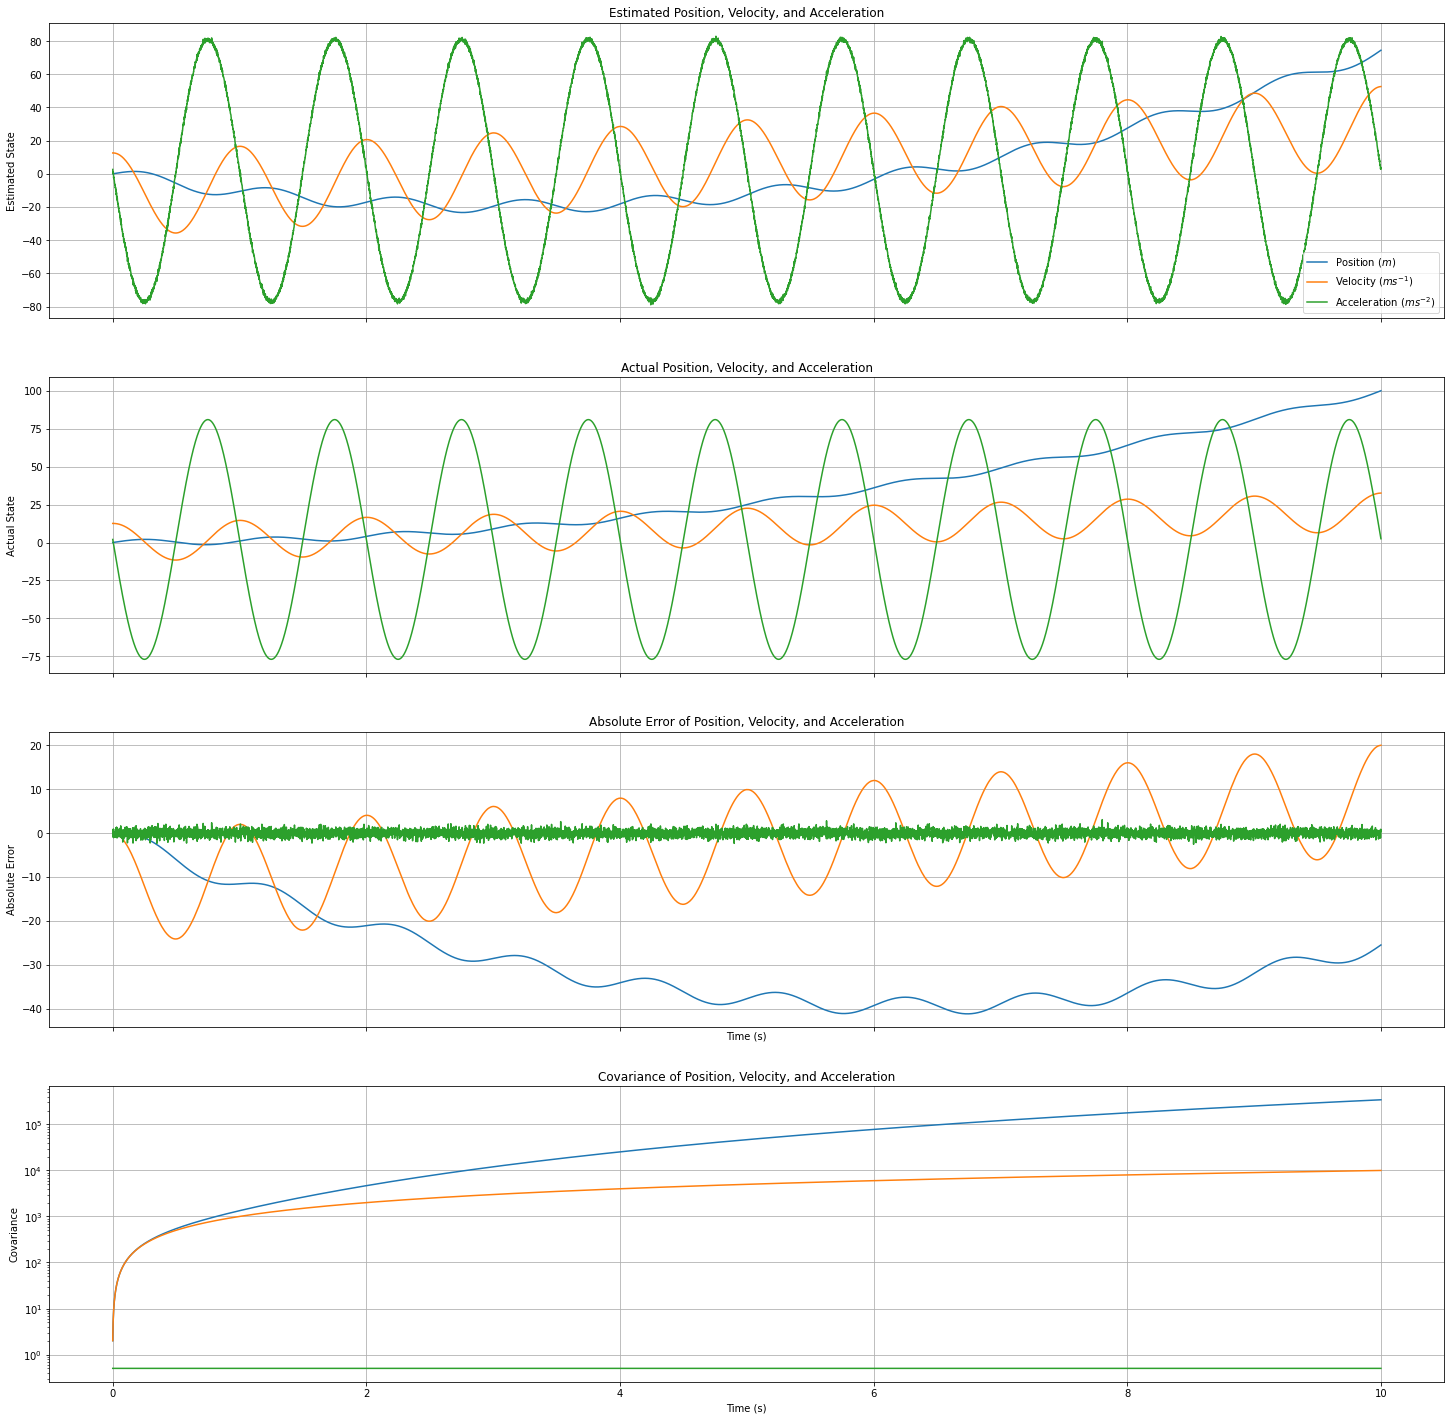

In [8]:
(fig, axes) = plt.subplots(4, sharex=True, figsize=(25, 25))

axes[0].plot(t_vals, kalman_state[:, 0], label="Position ($m$)")
axes[0].plot(t_vals, kalman_state[:, 1], label="Velocity ($ms^{-1}$)")
axes[0].plot(t_vals, kalman_state[:, 2], label="Acceleration ($ms^{-2}$)")
axes[0].grid(True)
axes[0].set_title("Estimated Position, Velocity, and Acceleration")
axes[0].set(ylabel = "Estimated State")
axes[0].legend()

axes[1].plot(t_vals, act_state[:, 0])
axes[1].plot(t_vals, act_state[:, 1])
axes[1].plot(t_vals, act_state[:, 2])
axes[1].grid(True)
axes[1].set_title("Actual Position, Velocity, and Acceleration")
axes[1].set(ylabel = "Actual State")

err_vals = kalman_state - act_state

axes[2].plot(t_vals, err_vals[:, 0])
axes[2].plot(t_vals, err_vals[:, 1])
axes[2].plot(t_vals, err_vals[:, 2])
axes[2].grid(True)
axes[2].set_title("Absolute Error of Position, Velocity, and Acceleration")
axes[2].set(ylabel = "Absolute Error")

axes[3].semilogy(t_vals, cov_state[:, 0])
axes[3].semilogy(t_vals, cov_state[:, 1])
axes[3].semilogy(t_vals, cov_state[:, 2])
axes[3].grid(True)
axes[3].set_title("Covariance of Position, Velocity, and Acceleration")
axes[3].set(xlabel = "Time (s)", ylabel = "Covariance")

plt.show()